In [3]:
#IMPORTACIONES
import pandas as pd
import numpy as np
from src import soporte as sp
# -----------------------------------------------------------------------
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) 
import warnings
warnings.filterwarnings("ignore")

## FASE 1: Exploración y Limpieza

### Exploración Inicial:
- Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas
relevantes.   
- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de
las columnas involucradas.   
- Une los dos conjuntos de datos de la forma más eficiente.


In [4]:
#Leer csv:

flight = sp.leer_csv("files", "Customer Flight Activity")
loyalty = sp.leer_csv("files", "Customer Loyalty History")

El archivo se ha cargado con éxito.
El archivo se ha cargado con éxito.


In [24]:
#vemos las 10 primeras filas del primer DF

print("Las primeras 10 filas del DataFrame 'flight' son: \n")
display(flight.head(10))
print("----")

#vemos las 10 últimas filas del primer DF

print("Las últimass 10 filas del DataFrame 'flight' son: \n")
display(flight.tail(10))
print("----")

#vemos las 10 primeras filas del segundo DF

print("Las primeras 10 filas del DataFrame 'loyalty' son: \n")
display(loyalty.head(10))
print("----")

#vemos las 10 últimas filas del segundo DF

print("Las últimas 10 filas del DataFrame 'loyalty' son: \n")
display(loyalty.tail(10))

Las primeras 10 filas del DataFrame 'flight' son: 



,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
5,100301,2017,1,0,0,0,0,0.0,0,0
6,100364,2017,1,0,0,0,0,0.0,0,0
7,100380,2017,1,0,0,0,0,0.0,0,0
8,100428,2017,1,6,0,6,606,60.0,0,0
9,100504,2017,1,0,0,0,0,0.0,0,0


----
Las últimass 10 filas del DataFrame 'flight' son: 



,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405614,999631,2018,12,11,1,12,2244,224.0,0,0
405615,999891,2018,10,0,0,0,0,0.0,0,0
405616,999758,2018,12,1,0,1,896,89.0,0,0
405617,999891,2018,11,0,0,0,0,0.0,0,0
405618,999891,2018,12,0,0,0,0,0.0,0,0
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


----
Las primeras 10 filas del DataFrame 'loyalty' son: 



,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
5,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2012,5,NaN,NaN
6,927943,Canada,Ontario,Toronto,P5S 6R4,Female,College,NaN,Single,Star,3857.95,Standard,2014,6,NaN,NaN
7,188893,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,12,NaN,NaN
8,852392,Canada,Quebec,Montreal,H2Y 2W2,Female,Bachelor,100159.0,Married,Star,3861.49,Standard,2015,5,NaN,NaN
9,866307,Canada,Ontario,Toronto,M8Y 4K8,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,10,NaN,NaN


----
Las últimas 10 filas del DataFrame 'loyalty' son: 



,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16727,546773,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Married,Star,52811.49,Standard,2015,9,NaN,NaN
16728,302628,Canada,Quebec,Tremblant,H5Y 2S9,Male,Bachelor,61718.0,Single,Star,55277.45,Standard,2013,3,NaN,NaN
16729,302460,Canada,British Columbia,Whistler,V6T 1Y8,Female,Bachelor,88425.0,Married,Star,56675.94,Standard,2014,9,NaN,NaN
16730,672917,Canada,Ontario,Toronto,M1R 4K3,Female,Bachelor,76778.0,Single,Star,58166.55,Standard,2015,1,2015.0,9.0
16731,900501,Canada,Ontario,Sudbury,M5V 1G5,Male,College,NaN,Single,Star,61134.68,Standard,2012,9,NaN,NaN
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [25]:
#Comprobamos el total de filas y columnas que tenemos en el DF

print(f"En el DataFrame tenemos un total de {flight.shape[0]} filas y {flight.shape[1]} columnas.")
print(f"En el DataFrame tenemos un total de {loyalty.shape[0]} filas y {loyalty.shape[1]} columnas.")

En el DataFrame tenemos un total de 405624 filas y 10 columnas.
En el DataFrame tenemos un total de 16737 filas y 16 columnas.


In [26]:
#Vemos los duplicados en los dos DF:

print(f"En el primer DataFrame hay {flight.duplicated().sum()} duplicados")
print(f"En el segundo DataFrame hay {loyalty.duplicated().sum()} duplicados")

En el primer DataFrame hay 1864 duplicados
En el segundo DataFrame hay 0 duplicados


In [27]:
#Vamos a comprobar cómo son los duplicados que hay en el dataframe flight:

duplicates_df = flight[flight.duplicated(keep=False)] #hay que poner keep=False para que todos los valores duplicados se muestren. En este caso los necesitamos para comprobarlo
duplicates_df.head(6)

#Como podemos observar, el loyalty_number se repite. 

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
226,112142,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
477,126100,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0


In [28]:
#Lo primero que vamos a hacer antes de unir ambas tablas es gestionar los duplicados:

flight.drop_duplicates(inplace=True)
flight.reset_index(drop=True)

print(f"Hay {flight.duplicated().sum()} duplicados en el DF después de realizar el .drop_duplicates")
print("----")
print(f"En el DataFrame final tenemos un total de {flight.shape[0]} filas y {flight.shape[1]} columnas.")


Hay 0 duplicados en el DF después de realizar el .drop_duplicates
----
En el DataFrame final tenemos un total de 403760 filas y 10 columnas.


In [29]:
#Unimos las columnas para poder realizar los cambios:

df_union = loyalty.merge(flight, on =["Loyalty Number"], how = "left")
df_union.sample(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
273448,805226,Canada,Quebec,Montreal,H2Y 2W2,Female,College,NaN,Married,Star,2615.91,Standard,2017,7,NaN,NaN,2017,5,0,0,0,0,0.0,0,0
252951,462232,Canada,Ontario,Ottawa,K1G 4Z0,Female,Bachelor,63899.0,Married,Star,2435.32,Standard,2018,7,NaN,NaN,2018,6,0,0,0,0,0.0,0,0
111583,135279,Canada,Ontario,Toronto,P5S 6R4,Male,College,NaN,Married,Nova,2938.73,Standard,2018,1,NaN,NaN,2018,11,5,3,8,2552,255.0,0,0
386250,648043,Canada,Ontario,Trenton,K8V 4B2,Female,College,NaN,Single,Star,13727.80,Standard,2014,10,NaN,NaN,2017,11,7,0,7,3192,319.0,0,0
279434,772960,Canada,Ontario,London,M5B 3E4,Male,Bachelor,93703.0,Single,Star,2679.69,Standard,2013,1,NaN,NaN,2018,4,0,0,0,0,0.0,0,0


In [30]:
#Comprobamos de nuevo los duplicados y las filas:

print(f"En el DataFrame final tenemos un total de {df_union.shape[0]} filas y {df_union.shape[1]} columnas.")
print(f"Finalmente el total de duplicados en el DataFrame es de {flight.duplicated().sum()}")

En el DataFrame final tenemos un total de 403760 filas y 25 columnas.
Finalmente el total de duplicados en el DataFrame es de 0


In [31]:
#Nos muestra la cantidad de nulos en el total del DataFrame

print(f"Tenemos \n {df_union.isna().sum()} nulos en el conjunto de datos.")


Tenemos 
 Loyalty Number                      0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102260
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              354110
Cancellation Month             354110
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
dtype: int64 nulos en el conjunto de dat

In [32]:
#Vamos a ver con más detenimiento esos nulos:

nulos = df_union[["Salary", "Cancellation Year", "Cancellation Month"]]
nulos.sample(10)

#Vamos a guardarlo para que podamos analizarlo luego más claramente

,Salary,Cancellation Year,Cancellation Month
217390,NaN,NaN,NaN
261850,50013.0,NaN,NaN
360625,105345.0,NaN,NaN
291548,89394.0,NaN,NaN
26172,-49830.0,NaN,NaN
202735,70384.0,NaN,NaN
57971,84580.0,NaN,NaN
303030,59262.0,NaN,NaN
30305,NaN,NaN,NaN
204052,63228.0,2018.0,5.0


In [33]:
#Nos muestra los tipos de columnas

print(f"Los tipos de las columnas son:")
display(pd.DataFrame(df_union.dtypes, columns = ["type"]))

#Como podemos observar, tendremos que cambiar el tipo de algunas de las columnas. Lo haremos en la fase de limpieza de datos. 

Los tipos de las columnas son:


,type
Loyalty Number,int64
Country,object
Province,object
City,object
Postal Code,object
Gender,object
Education,object
Salary,float64
Marital Status,object
Loyalty Card,object


In [34]:
#En nuestro primer análisis vamos a sacar los principales estadísticos de las columnas categóricas y numéricas:
#Empezamos definiendo las columnas categóricas y las numéricas. 

col_categoricas = df_union.select_dtypes(include = "O")


#Llamamos a una de las funciones del soporte que nos muestra los valores únicos

print(f"Los principales estadísticos de las COLUMNAS CATEGÓRICAS son:\n")
sp.describir_columnas(df_union, col_categoricas)

print("----")
#Definimos las columnas numéricas para poder ver sus principales estadísticos:

col_numericas = df_union.select_dtypes(include=np.number)

print(f"Los principales estadísticos de las COLUMNAS NUMÉRICAS son:\n")
sp.describir_columnas(df_union, col_numericas)


Los principales estadísticos de las COLUMNAS CATEGÓRICAS son:

Descripción de la columna COUNTRY:


,count,unique,top,freq
Country,403760,1,Canada,403760



 ----- 

Descripción de la columna PROVINCE:


,count,unique,top,freq
Province,403760,11,Ontario,130258



 ----- 

Descripción de la columna CITY:


,count,unique,top,freq
City,403760,29,Toronto,80775



 ----- 

Descripción de la columna POSTAL CODE:


,count,unique,top,freq
Postal Code,403760,55,V6E 3D9,21944



 ----- 

Descripción de la columna GENDER:


,count,unique,top,freq
Gender,403760,2,Female,202757



 ----- 

Descripción de la columna EDUCATION:


,count,unique,top,freq
Education,403760,5,Bachelor,252567



 ----- 

Descripción de la columna MARITAL STATUS:


,count,unique,top,freq
Marital Status,403760,3,Married,234845



 ----- 

Descripción de la columna LOYALTY CARD:


,count,unique,top,freq
Loyalty Card,403760,3,Star,183745



 ----- 

Descripción de la columna ENROLLMENT TYPE:


,count,unique,top,freq
Enrollment Type,403760,2,Standard,380419



 ----- 

----
Los principales estadísticos de las COLUMNAS NUMÉRICAS son:

Descripción de la columna LOYALTY NUMBER:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.0,326699.0,550598.0,772152.0,999986.0



 ----- 

Descripción de la columna SALARY:


,count,mean,std,min,25%,50%,75%,max
Salary,301500.0,79258.576285,34983.929798,-58486.0,59262.0,73479.0,88606.0,407228.0



 ----- 

Descripción de la columna CLV:


,count,mean,std,min,25%,50%,75%,max
CLV,403760.0,7990.864857,6863.31716,1898.01,3981.78,5776.34,8937.12,83325.38



 ----- 

Descripción de la columna ENROLLMENT YEAR:


,count,mean,std,min,25%,50%,75%,max
Enrollment Year,403760.0,2015.250716,1.979427,2012.0,2014.0,2015.0,2017.0,2018.0



 ----- 

Descripción de la columna ENROLLMENT MONTH:


,count,mean,std,min,25%,50%,75%,max
Enrollment Month,403760.0,6.667555,3.398829,1.0,4.0,7.0,10.0,12.0



 ----- 

Descripción de la columna CANCELLATION YEAR:


,count,mean,std,min,25%,50%,75%,max
Cancellation Year,49650.0,2016.50435,1.380482,2013.0,2016.0,2017.0,2018.0,2018.0



 ----- 

Descripción de la columna CANCELLATION MONTH:


,count,mean,std,min,25%,50%,75%,max
Cancellation Month,49650.0,6.962095,3.454362,1.0,4.0,7.0,10.0,12.0



 ----- 

Descripción de la columna YEAR:


,count,mean,std,min,25%,50%,75%,max
Year,403760.0,2017.500352,0.5,2017.0,2017.0,2018.0,2018.0,2018.0



 ----- 

Descripción de la columna MONTH:


,count,mean,std,min,25%,50%,75%,max
Month,403760.0,6.501335,3.451982,1.0,4.0,7.0,10.0,12.0



 ----- 

Descripción de la columna FLIGHTS BOOKED:


,count,mean,std,min,25%,50%,75%,max
Flights Booked,403760.0,4.13405,5.230064,0.0,0.0,1.0,8.0,21.0



 ----- 

Descripción de la columna FLIGHTS WITH COMPANIONS:


,count,mean,std,min,25%,50%,75%,max
Flights with Companions,403760.0,1.036569,2.080472,0.0,0.0,0.0,1.0,11.0



 ----- 

Descripción de la columna TOTAL FLIGHTS:


,count,mean,std,min,25%,50%,75%,max
Total Flights,403760.0,5.170619,6.526858,0.0,0.0,1.0,10.0,32.0



 ----- 

Descripción de la columna DISTANCE:


,count,mean,std,min,25%,50%,75%,max
Distance,403760.0,1214.460979,1434.098521,0.0,0.0,525.0,2342.0,6293.0



 ----- 

Descripción de la columna POINTS ACCUMULATED:


,count,mean,std,min,25%,50%,75%,max
Points Accumulated,403760.0,124.263761,146.696179,0.0,0.0,53.0,240.0,676.5



 ----- 

Descripción de la columna POINTS REDEEMED:


,count,mean,std,min,25%,50%,75%,max
Points Redeemed,403760.0,30.838587,125.758002,0.0,0.0,0.0,0.0,876.0



 ----- 

Descripción de la columna DOLLAR COST POINTS REDEEMED:


,count,mean,std,min,25%,50%,75%,max
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.0,0.0,0.0,0.0,71.0



 ----- 



In [35]:
#Ahora vamos a ver los valores únicos de cada una de las columnas

print("Los valores que tenemos para las COLUMNAS CATEGÓRICAS son:\n")
sp.valores_unicos(df_union, col_categoricas)

print("----")

print("Los valores que tenemos para las COLUMNAS NUMÉRICAS son:\n")
sp.valores_unicos(df_union, col_numericas)

Los valores que tenemos para las COLUMNAS CATEGÓRICAS son:

La columna COUNTRY tiene los siguientes valores únicos:


,Country
Canada,403760


----
La columna PROVINCE tiene los siguientes valores únicos:


,Province
Ontario,130258
British Columbia,106442
Quebec,79573
Alberta,23360
Manitoba,15900


----
La columna CITY tiene los siguientes valores únicos:


,City
Toronto,80775
Vancouver,62314
Montreal,49687
Winnipeg,15900
Whistler,13994


----
La columna POSTAL CODE tiene los siguientes valores únicos:


,Postal Code
V6E 3D9,21944
V5R 1W3,16529
V6T 1Y8,13994
V6E 3Z3,13128
M2M 7K8,12855


----
La columna GENDER tiene los siguientes valores únicos:


,Gender
Female,202757
Male,201003


----
La columna EDUCATION tiene los siguientes valores únicos:


,Education
Bachelor,252567
College,102260
High School or Below,18915
Doctor,17731
Master,12287


----
La columna MARITAL STATUS tiene los siguientes valores únicos:


,Marital Status
Married,234845
Single,108153
Divorced,60762


----
La columna LOYALTY CARD tiene los siguientes valores únicos:


,Loyalty Card
Star,183745
Nova,136883
Aurora,83132


----
La columna ENROLLMENT TYPE tiene los siguientes valores únicos:


,Enrollment Type
Standard,380419
2018 Promotion,23341


----
----
Los valores que tenemos para las COLUMNAS NUMÉRICAS son:

La columna LOYALTY NUMBER tiene los siguientes valores únicos:


,Loyalty Number
890702,48
617489,48
974875,48
736504,48
713132,47


----
La columna SALARY tiene los siguientes valores únicos:


,Salary
101933.0,552
61809.0,336
62283.0,336
51573.0,336
64001.0,312


----
La columna CLV tiene los siguientes valores únicos:


,CLV
8564.77,312
14024.36,311
4330.39,309
3873.65,308
25464.82,305


----
La columna ENROLLMENT YEAR tiene los siguientes valores únicos:


,Enrollment Year
2018,72401
2017,60038
2016,59294
2013,57796
2014,57067


----
La columna ENROLLMENT MONTH tiene los siguientes valores únicos:


,Enrollment Month
5,36314
12,35635
7,35544
11,34867
10,34817


----
La columna CANCELLATION YEAR tiene los siguientes valores únicos:


,Cancellation Year
2018.0,15519
2017.0,12147
2016.0,10248
2015.0,6360
2014.0,4344


----
La columna CANCELLATION MONTH tiene los siguientes valores únicos:


,Cancellation Month
12.0,5112
11.0,5095
8.0,4992
7.0,4480
10.0,4322


----
La columna YEAR tiene los siguientes valores únicos:


,Year
2018,202022
2017,201738


----
La columna MONTH tiene los siguientes valores únicos:


,Month
11,33663
10,33662
12,33662
9,33659
8,33655


----
La columna FLIGHTS BOOKED tiene los siguientes valores únicos:


,Flights Booked
0,196128
3,18228
11,15705
5,15084
7,14561


----
La columna FLIGHTS WITH COMPANIONS tiene los siguientes valores únicos:


,Flights with Companions
0,295023
2,19272
3,19015
1,17905
4,13665


----
La columna TOTAL FLIGHTS tiene los siguientes valores únicos:


,Total Flights
0,196128
6,15273
10,14393
8,14056
4,13656


----
La columna DISTANCE tiene los siguientes valores únicos:


,Distance
0,196128
2520,410
2880,401
1680,389
2160,365


----
La columna POINTS ACCUMULATED tiene los siguientes valores únicos:


,Points Accumulated
0.0,196128
180.0,763
270.0,734
288.0,717
189.0,709


----
La columna POINTS REDEEMED tiene los siguientes valores únicos:


,Points Redeemed
0,379579
447,103
523,100
443,98
516,97


----
La columna DOLLAR COST POINTS REDEEMED tiene los siguientes valores únicos:


,Dollar Cost Points Redeemed
0,379579
36,1037
38,1001
40,993
42,983


----


### Limpieza de Datos:
- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
- Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los
datos para el análisis estadístico.

In [36]:
#Poner en minúsculas las columnas:
#Usaremos una de las funciones que tenemos en el soporte:

sp.col_minuscula(df_union)

Nombres de las columnas antes del cambio:
Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')
----

Nombres de las columnas después del cambio:
Index(['loyalty number', 'country', 'province', 'city', 'postal code',
       'gender', 'education', 'salary', 'marital status', 'loyalty card',
       'clv', 'enrollment type', 'enrollment year', 'enrollment month',
       'cancellation year', 'cancellation month', 'year', 'month',
       'flights booked', 'flights with companions', 'total flights',
       'distance', 'points accumulated', 'points redeemed',
       'dollar cost p

In [37]:
#Poner en minúsculas los valores del DF. Para tener más homogeneidad en el DF y para que no haya que preocuparte de mayúsculas. 
#Usaremos una de las funciones que tenemos en el soporte:

sp.minusculas(df_union)

#comprobamos que ha funcionado:
df_union.head(2)

,loyalty number,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed
0,480934,canada,ontario,toronto,m2z 4k1,female,bachelor,83236.0,married,star,3839.14,standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,canada,ontario,toronto,m2z 4k1,female,bachelor,83236.0,married,star,3839.14,standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0


In [38]:
#Cambiar los nombres de las columnas para que no existan espacios y sean reemplazados por '_'
#Usaremos una de las funciones que tenemos en el soporte:

sp.modificar_columnas(df_union)

Las columnas antes de ser cambiadas son: ['loyalty number', 'country', 'province', 'city', 'postal code', 'gender', 'education', 'salary', 'marital status', 'loyalty card', 'clv', 'enrollment type', 'enrollment year', 'enrollment month', 'cancellation year', 'cancellation month', 'year', 'month', 'flights booked', 'flights with companions', 'total flights', 'distance', 'points accumulated', 'points redeemed', 'dollar cost points redeemed']
---
Las columnas después de ser cambiadas son: ['loyalty_number', 'country', 'province', 'city', 'postal_code', 'gender', 'education', 'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month', 'cancellation_year', 'cancellation_month', 'year', 'month', 'flights_booked', 'flights_with_companions', 'total_flights', 'distance', 'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed']


In [39]:
#Cambiar algunos nombres de columnas para que esten más claros:

nuevas_columnas = {"year":"flight_year", "month":"flight_month"}

sp.cambiar_nombres_columnas(df_union, nuevas_columnas)
print(f"Las columnas después de ser cambiadas son: {list(df_union.columns)}")

Las columnas después de ser cambiadas son: ['loyalty_number', 'country', 'province', 'city', 'postal_code', 'gender', 'education', 'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month', 'cancellation_year', 'cancellation_month', 'flight_year', 'flight_month', 'flights_booked', 'flights_with_companions', 'total_flights', 'distance', 'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed']


In [40]:
#Recordemos los tipos de dato que había en las columnas y que debíamos modificar algunos de ellos:
print(f"Los tipos de las columnas son:")
display(pd.DataFrame(df_union.dtypes, columns = ["type"]))

Los tipos de las columnas son:


,type
loyalty_number,int64
country,object
province,object
city,object
postal_code,object
gender,object
education,object
salary,float64
marital_status,object
loyalty_card,object


In [41]:
#Las columnas "cancellation_year", "points_accumulated" deben ser cambiados a INT
#Por otros lado, "cancellation_month", así como "enrollment_month" y "flight_month" serán cambiados de mes por número a mes por texto.
#Llamemos a una función en el documento de soporte: 

lista_int = ["cancellation_year", "points_accumulated"]
sp.cambiar_dato(df_union, lista_int, "int")

#En la función, para que no diera problemas se ha tenido que realizar un .fillna(0). Tendremos que analizar esos ceros con detenimiento en los nulos

Antes del cambio de tipo:


,type
cancellation_year,float64
points_accumulated,float64


----
Después del cambio de tipo, las columnas quedan:


,type
cancellation_year,int64
points_accumulated,int64


In [42]:
#He decidido cambiar los meses por escrito para que sea más visual.
#Creamos un diccionario para los meses:

months = {
    1: 'january',
    2: 'february',
    3: 'march',
    4: 'april',
    5: 'may',
    6: 'june',
    7: 'july',
    8: 'august',
    9: 'september',
    10: 'october',
    11: 'november',
    12: 'december'
}

#Usamos la función .map para aplicarlo:
df_union['enrollment_month'] = df_union['enrollment_month'].map(months)
df_union['cancellation_month'] = df_union['cancellation_month'].map(months)
df_union['flight_month'] = df_union['flight_month'].map(months)

print("Los meses actualizados quedarían:\n")
print(list(df_union['enrollment_month'].unique()))
print(list(df_union['cancellation_month'].unique()))
print(list(df_union['flight_month'].unique()))

df_union[['enrollment_month','cancellation_month', 'flight_month']].sample(5)

#Volvemos a comprobar los tipos:
print(f"Los tipos de las columnas son:\n")
display(pd.DataFrame(df_union[["enrollment_month", "cancellation_month", "flight_month"]].dtypes, columns = ["type"]))

Los meses actualizados quedarían:

['february', 'march', 'july', 'october', 'may', 'june', 'december', 'january', 'november', 'august', 'april', 'september']
[nan, 'january', 'december', 'april', 'february', 'july', 'november', 'may', 'june', 'october', 'august', 'september', 'march']
['january', 'february', 'march', 'april', 'october', 'may', 'june', 'july', 'august', 'september', 'november', 'december']
Los tipos de las columnas son:



,type
enrollment_month,object
cancellation_month,object
flight_month,object


In [43]:
#Recordemos el DF que nos hemos guardado cuando hemos visto los nulos. 

display(nulos.sample(10))

#Vamos a ver los nulos. Sacamos el porcentaje de nulos de cada columna: 

df_nulos = pd.DataFrame((nulos.isnull().sum() / nulos.shape[0]) * 100, columns = ["%_nulos"])

df_nulos[df_nulos["%_nulos"] > 0]

#Recordemos también que al cambiar el tipo de dato hemos rellenado los nulos Cancellation Year con cero.
#¿Cómo tratar estos nulos?

,Salary,Cancellation Year,Cancellation Month
21225,101736.0,NaN,NaN
352655,67095.0,NaN,NaN
398279,198691.0,2018.0,11.0
150599,70540.0,2017.0,12.0
117629,89345.0,NaN,NaN
265185,NaN,NaN,NaN
254563,92419.0,NaN,NaN
10926,NaN,2018.0,4.0
316120,86590.0,NaN,NaN
317714,49760.0,NaN,NaN


,%_nulos
Salary,25.326927
Cancellation Year,87.703091
Cancellation Month,87.703091


In [44]:
#Vamos a empezar con el más sencillo: Cancellation Month
#Al tener un alto porcentaje de nulos lo solucionaremos rellenando los valores nulos en la columna con 'unknown'

sp.rellenar_nulos(df_union, "cancellation_month", "unknown")

El total de nulos en las columnas cancellation_month después de aplicar .fillna() es: 0


In [45]:
#Al analizar de DF observamos que hay muchos valores 0. Vamos a comprobar antes de que no se trate de nulos:
#Recordemos las columnas numéricas del análisis:

col_numericas = df_union.select_dtypes(include=np.number)
col_numericas.head()


,loyalty_number,salary,clv,enrollment_year,cancellation_year,flight_year,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,480934,83236.0,3839.14,2016,0,2017,0,0,0,0,0,0,0
1,480934,83236.0,3839.14,2016,0,2017,3,0,3,2823,282,0,0
2,480934,83236.0,3839.14,2016,0,2017,0,0,0,0,0,0,0
3,480934,83236.0,3839.14,2016,0,2017,0,0,0,0,0,0,0
4,480934,83236.0,3839.14,2016,0,2018,6,2,8,3352,335,465,38


In [46]:
#Vamos a ver cuál es el número de ceros en cada una de las columnas.
#Primero vamos a recordar el número de filas total:

print(f"El número de filas del DataFrame es {df_union.shape[0]}")
print("----")

# Contar los ceros en cada columna numérica
ceros_columnas = (col_numericas == 0).sum()
print(ceros_columnas)
print("----")

#El porcentaje sería:
porcentaje_ceros = (ceros_columnas / len(df_union)) * 100
porcentaje_ceros

El número de filas del DataFrame es 403760
----
loyalty_number                      0
salary                              0
clv                                 0
enrollment_year                     0
cancellation_year              354110
flight_year                         0
flights_booked                 196128
flights_with_companions        295023
total_flights                  196128
distance                       196128
points_accumulated             196128
points_redeemed                379579
dollar_cost_points_redeemed    379579
dtype: int64
----


loyalty_number                  0.000000
salary                          0.000000
clv                             0.000000
enrollment_year                 0.000000
cancellation_year              87.703091
flight_year                     0.000000
flights_booked                 48.575391
flights_with_companions        73.068902
total_flights                  48.575391
distance                       48.575391
points_accumulated             48.575391
points_redeemed                94.011046
dollar_cost_points_redeemed    94.011046
dtype: float64

In [47]:
#Comprobemos de nuevo los valores únicos de las columnas numéricas:
#Llamaremos a una función que tenemos en el soporte:

sp.valores_unicos(df_union, col_numericas)

#Es muy probable que los 0 no sean nulos, por lo tanto los asimilamos como dato numérico. 
#Pero ya hemos dicho que en el caso de cancellation_year sí se trata de nulos. Al ser un porcentaje tan alto (87%), lo dejaremos tal cual y en caso de tener que realizar un análisis lo tendremos en cuenta.
#También tendremos en cuenta el resto de columnas con altos porcentajes de ceros

La columna LOYALTY_NUMBER tiene los siguientes valores únicos:


,loyalty_number
890702,48
617489,48
974875,48
736504,48
713132,47


----
La columna SALARY tiene los siguientes valores únicos:


,salary
101933.0,552
61809.0,336
62283.0,336
51573.0,336
64001.0,312


----
La columna CLV tiene los siguientes valores únicos:


,clv
8564.77,312
14024.36,311
4330.39,309
3873.65,308
25464.82,305


----
La columna ENROLLMENT_YEAR tiene los siguientes valores únicos:


,enrollment_year
2018,72401
2017,60038
2016,59294
2013,57796
2014,57067


----
La columna CANCELLATION_YEAR tiene los siguientes valores únicos:


,cancellation_year
0,354110
2018,15519
2017,12147
2016,10248
2015,6360


----
La columna FLIGHT_YEAR tiene los siguientes valores únicos:


,flight_year
2018,202022
2017,201738


----
La columna FLIGHTS_BOOKED tiene los siguientes valores únicos:


,flights_booked
0,196128
3,18228
11,15705
5,15084
7,14561


----
La columna FLIGHTS_WITH_COMPANIONS tiene los siguientes valores únicos:


,flights_with_companions
0,295023
2,19272
3,19015
1,17905
4,13665


----
La columna TOTAL_FLIGHTS tiene los siguientes valores únicos:


,total_flights
0,196128
6,15273
10,14393
8,14056
4,13656


----
La columna DISTANCE tiene los siguientes valores únicos:


,distance
0,196128
2520,410
2880,401
1680,389
2160,365


----
La columna POINTS_ACCUMULATED tiene los siguientes valores únicos:


,points_accumulated
0,196128
180,793
288,781
252,779
226,774


----
La columna POINTS_REDEEMED tiene los siguientes valores únicos:


,points_redeemed
0,379579
447,103
523,100
443,98
516,97


----
La columna DOLLAR_COST_POINTS_REDEEMED tiene los siguientes valores únicos:


,dollar_cost_points_redeemed
0,379579
36,1037
38,1001
40,993
42,983


----


In [48]:
#Nos queda por gestionar los nulos de SALARY.
#Vamos a ver sus estadísticos con más detenimiento

display(df_union["salary"].describe().reset_index())
print("----")

#En el mínimo podemos ver que hay un número negativo. Vamos a comprobarlo:

if (df_union["salary"] < 0).any(): #verificar si hay algún True en la serie
    print("Hay números negativos en la columna salario.")
else:
    print("No hay números negativos en la columna salario.")

,index,salary
0,count,301500.000000
1,mean,79258.576285
2,std,34983.929798
3,min,-58486.000000
4,25%,59262.000000
5,50%,73479.000000
6,75%,88606.000000
7,max,407228.000000


----
Hay números negativos en la columna salario.


In [49]:
#Al tener confirmación vamos a solucionarlo:
#Usando .abs los números negativos son eliminados de la columna.

df_union['salary'] = df_union['salary'].abs()

print("Después de usar .abs:")
if (df_union["salary"] < 0).any(): 
    print("Hay números negativos en la columna salario.")
else:
    print("No hay números negativos en la columna salario.")

Después de usar .abs:
No hay números negativos en la columna salario.


In [50]:
#Volvamos a ver sus principales estadísticos:
display(df_union["salary"].describe().reset_index())
print("----")

#Lo que nos interesa es la media y la mediana en este caso:
display(df_union["salary"].describe()[["mean", "50%"]].reset_index())

#Son similares pero aún así hay diferencia entre ellos. Vamos a probar con KNN e IterativeImputer

,index,salary
0,count,301500.000000
1,mean,79371.732902
2,std,34726.433958
3,min,9081.000000
4,25%,59262.000000
5,50%,73479.000000
6,75%,88606.000000
7,max,407228.000000


----


,index,salary
0,mean,79371.732902
1,50%,73479.000000


In [51]:
# Vamos a usar el IterativeImputer

imputer_iterative = IterativeImputer(max_iter=20, random_state=42)


imputer_iterative_imputado = imputer_iterative.fit_transform(df_union[["salary"]])

df_union["salary_iterative"] = imputer_iterative_imputado

# Comprobamos los valores nulos en la columna "salary" después de la imputación
print(f"Después de la imputación iterativa, tenemos:\n{df_union['salary_iterative'].isnull().sum()} valores nulos")

Después de la imputación iterativa, tenemos:
0 valores nulos


In [52]:
imputer_knn = KNNImputer(n_neighbors=3)  

# Ajustamos y transformamos los datos

imputer_knn_imputado = imputer_knn.fit_transform(df_union[["salary"]])

df_union["salary_knn"] = imputer_knn_imputado

# Comprobamos los valores nulos en la columna "salary" después de la imputación
print(f"Después de la imputación KNN, tenemos:\n{df_union['salary_knn'].isnull().sum()} valores nulos")

Después de la imputación KNN, tenemos:
0 valores nulos


In [53]:
#Vamos a comprobar los estadísticos:

df_union[["salary", "salary_iterative", "salary_knn"]].describe()

,salary,salary_iterative,salary_knn
count,301500.000000,403760.000000,403760.000000
mean,79371.732902,79371.732902,79371.732902
std,34726.433958,30008.343196,30008.343196
min,9081.000000,9081.000000,9081.000000
25%,59262.000000,63901.000000,63901.000000
50%,73479.000000,79371.732902,79371.732902
75%,88606.000000,82940.000000,82940.000000
max,407228.000000,407228.000000,407228.000000


In [54]:
#Como podemos comprobar arriba no hay mucha diferencia entre el KNN y el Iterative. Así que no hay problema en escoger cualquiera de los dos. 
#Primero eliminamos las dos columnas sobrantes. Vamos a escoger el Iterative en este caso.

df_union.drop(["salary", "salary_knn"], axis = 1, inplace = True)

#Cambiamos el nombre de la columna que ha quedado para que mantenga el nombre de origen
df_union.rename(columns={'salary_iterative': 'salary'}, inplace = True)

#vemos el nombre de las columnas:
df_union.columns

Index(['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'marital_status', 'loyalty_card', 'clv',
       'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month', 'flight_year',
       'flight_month', 'flights_booked', 'flights_with_companions',
       'total_flights', 'distance', 'points_accumulated', 'points_redeemed',
       'dollar_cost_points_redeemed', 'salary'],
      dtype='object')

In [55]:
#Guardamos el DF limpio a csv para poder tarbajar con él.

sp.guardado_csv(df_union, "files", "customer")

El dataframe ha sido guardado con éxito.


----

# Fase 2: Visualización

In [57]:
df = sp.leer_csv("files", "customer")
df.head(2)

,loyalty_number,country,province,city,postal_code,gender,education,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,flight_year,flight_month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,salary
0,480934,canada,ontario,toronto,m2z 4k1,female,bachelor,married,star,3839.14,standard,2016,february,0,unknown,2017,january,0,0,0,0,0,0,0,83236.0
1,480934,canada,ontario,toronto,m2z 4k1,female,bachelor,married,star,3839.14,standard,2016,february,0,unknown,2017,february,3,0,3,2823,282,0,0,83236.0


In [58]:
#Establecemos un estilo de fondo para todas las gráficas, para que estéticamente quede mejor

sns.set_style("darkgrid")


1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

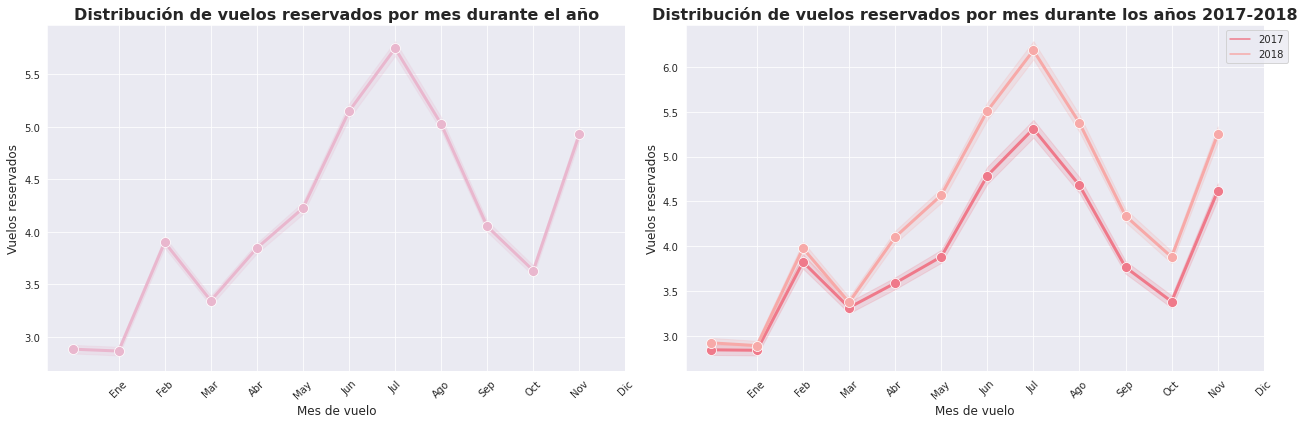

In [59]:
# Definimos el tamaño de la figura
plt.figure(figsize=(18, 6))
# Realizamos un lineplot para mostrar la relación entre las variables mes de vuelo y vuelos reservados. El lineplot se utiliza para la relación entre dos variales continuas a lo largo de un eje, generalmente el tiempo.

# Subplot 1: Gráfico de lineas para la distribución de vuelos reservados por mes
plt.subplot(1, 2, 1)

sns.lineplot(x="flight_month", y="flights_booked",
            data=df, 
            color="#e9b7ce",
            marker="o",
            markersize=10,
            linewidth=3)

# Título del gráfico
plt.title('Distribución de vuelos reservados por mes durante el año', fontsize=16, fontweight="bold")

# Nombre del eje x
plt.xlabel("Mes de vuelo", fontsize=12)

# Nombre del eje y
plt.ylabel("Vuelos reservados", fontsize=12)

# Etiquetas personalizadas para el eje x
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Establecer las etiquetas y la rotación del eje x
plt.xticks(range(1, 13), meses, rotation=45)

# Subplot 2: Gráfico de lineas para la distribución de vuelos reservados por mes durante los años 2017-2018
plt.subplot(1, 2, 2)

sns.lineplot(x="flight_month", y="flights_booked",
            data=df,  
            hue="flight_year",
            marker="o",
            markersize=10,
            linewidth=3,
            palette=["#ef798a", "#f7a9a8"])

plt.title("Distribución de vuelos reservados por mes durante los años 2017-2018", fontsize=16, fontweight="bold")
plt.xlabel("Mes de vuelo", fontsize=12)
plt.ylabel("Vuelos reservados", fontsize=12)
plt.xticks(range(1, 13), meses, rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1))

plt.tight_layout();

*Según podemos ver con la primera gráfica, los vuelos que se reservan por cada mes son más en la temporada de verano. Aunque tiene una subida en el mes de febrero, en marzo vuelve a bajar para continuar la escalada de reservas ahta llegar a su pico en el mes de julio. Vuelven a crecer las reservas a partir de octubre, hacia el mes de noviembre.*

*En la segunda gráfica podemos ver que hay poca variación con la explicación anterior, ambos años siguen la msima tendencia de alza de reservas durante los meses de verano y las mismas bajas en los mismos meses. Lo que sí podemos comprobar es que en el año 2018 hay un aumento de las reservas en comparación con el año anterior.*

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

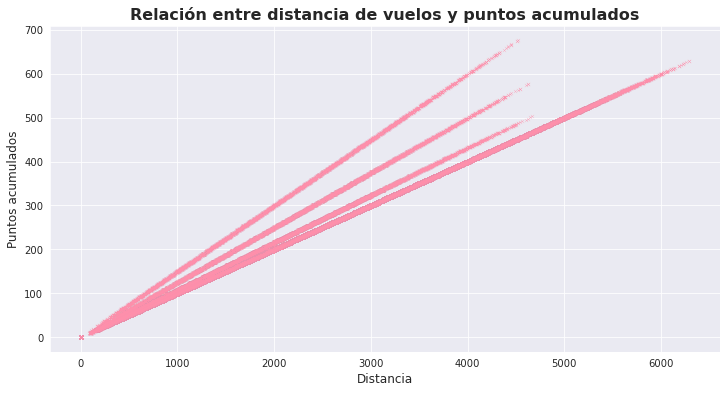

In [60]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="distance", 
                y="points_accumulated", 
                data=df,
                color="#ff8fab",
                s = 10, 
                marker = "x")

plt.title('Relación entre distancia de vuelos y puntos acumulados', fontsize=16, fontweight = "bold")
plt.xlabel("Distancia", fontsize=12)

plt.ylabel("Puntos acumulados", fontsize=12);


*Podemos observar una relación clara entre la ditancia de vuelos y los puntos acumulados por cliente. Esto quiere decir que a cuanta más distancia viajada, más puntos se han adquirido.*

3. ¿Cuál es la distribución de los clientes por provincia o estado?

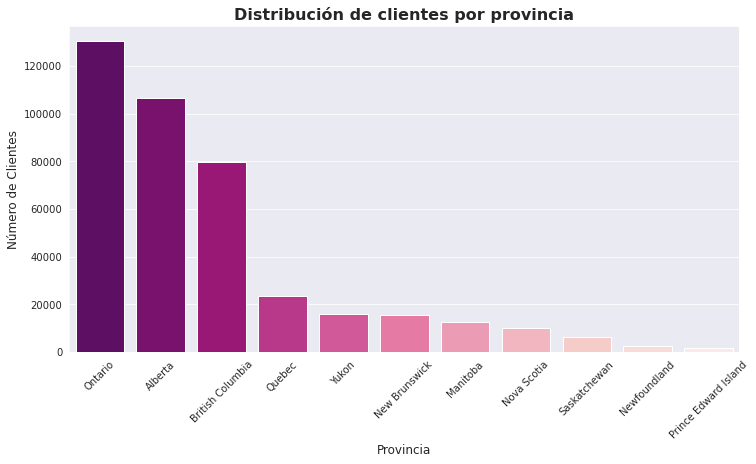

In [61]:
plt.figure(figsize=(12, 6))


sns.countplot(x = "province", 
            data = df,
            palette = "RdPu_r",
            order= df["province"].value_counts().index)

provinces = ['Ontario', 'Alberta', 'British Columbia', 'Quebec', 'Yukon',
    'New Brunswick', 'Manitoba', 'Nova Scotia', 'Saskatchewan',
    'Newfoundland', 'Prince Edward Island']

plt.xticks(range(len(provinces)), provinces, rotation=45)
plt.title("Distribución de clientes por provincia", fontsize=16, fontweight = "bold")
plt.xlabel("Provincia", fontsize=12)
plt.ylabel("Número de Clientes", fontsize=12);

*Lo que podemos observar a través de esta gráfica es que hay más clientes en las provincias más pobladas de Canadá, mientras que en el resto de territorios es más bajo el número de clientes. Si cabe a destacar en el caso de Quebec, que es una de las provincias más pobladas no haya tanto número de clientes. Aún así, las cuatro más pobladas se mantienen en el mismo puesto respecto a la distribución de clientes.*

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?


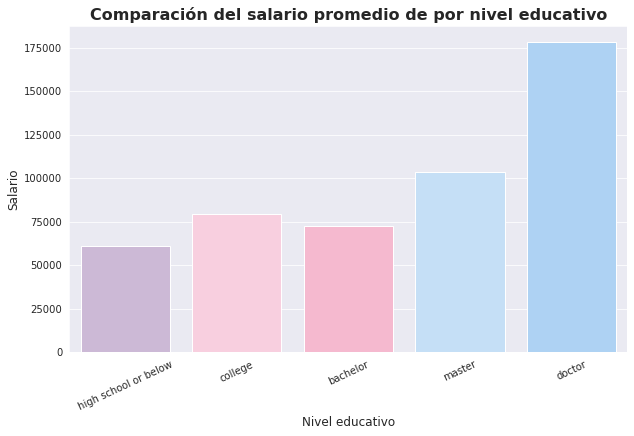

In [62]:
plt.figure(figsize=(10, 6))

orden_educacion = ['high school or below', 'college', 'bachelor', 'master', 'doctor']

sns.barplot(x= "education", 
            y= "salary", 
            data= df,
            ci= None,
            palette= ["#cdb4db", "#ffc8dd", "#ffafcc", "#bde0fe", "#a2d2ff"],
            order= orden_educacion)

plt.xticks(rotation=25)

plt.title("Comparación del salario promedio de por nivel educativo", fontsize=16, fontweight = "bold")
plt.xlabel("Nivel educativo", fontsize=12)
plt.ylabel("Salario", fontsize=12);

*En la gráfica podemos ver que cuanto más superior sea la educación el salario promedio para subir acorde. Tomando como ejemplo los dos extremos de la gráfica de barras, aquellos con estudios básicos o por debajo llegan a un salario medio de entre 50000 y 75000 (tirando más hacia la baja), mientras que en el caso de aquellos con doctorado la cifra alcanzaría los 175000.*

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

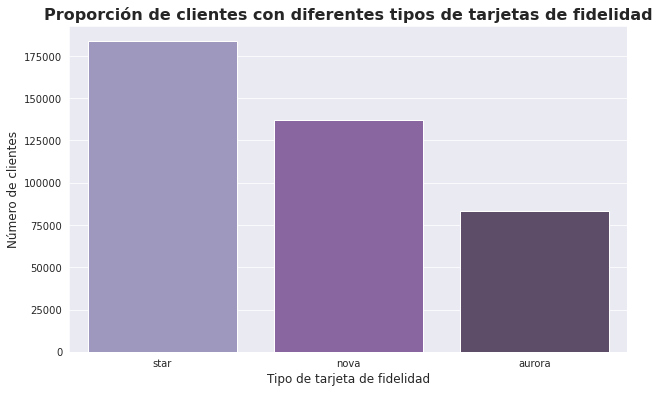

In [63]:
plt.figure(figsize=(10, 6))

sns.countplot(x= "loyalty_card",
            data= df,
            order= df["loyalty_card"].value_counts().index,
            palette= "BuPu_d")


plt.title("Proporción de clientes con diferentes tipos de tarjetas de fidelidad", fontsize = 16, fontweight = "bold")
plt.xlabel("Tipo de tarjeta de fidelidad", fontsize=12)
plt.ylabel("Número de clientes", fontsize=12);

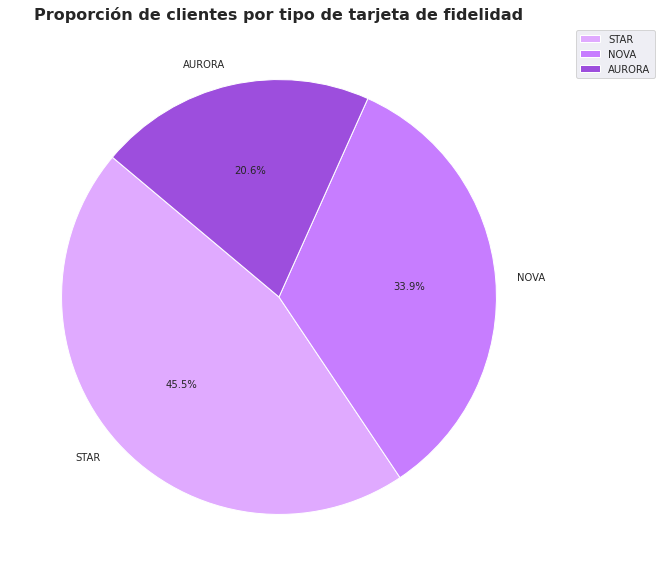

In [64]:
#Calculamos la cantidad de clientes por tipo de tarjeta de fidelidad

clientes_tarjeta = df["loyalty_card"].value_counts()
etiquetas_mayusculas = [label.upper() for label in clientes_tarjeta.index] # Convertir las etiquetas a mayúsculas

colors = ["#e0aaff", "#c77dff", "#9d4edd"] #establecer los colores

explode = ( 0 ,0, 0) # para sacar los quesitos hacia fuera

plt.figure(figsize=(10,10))

plt.pie(clientes_tarjeta, 
    labels = etiquetas_mayusculas, 
    colors = colors,
    autopct='%1.1f%%',
    startangle=140,
    explode = explode) 

plt.title('Proporción de clientes por tipo de tarjeta de fidelidad', fontsize = 16, fontweight = "bold")


plt.legend(bbox_to_anchor=(1.2, 1))
plt.show();

*En ambas gráficas podemos observar que la mayor parte de los clientes tiene la tarjeta 'STAR', seguida de 'NOVA' y la última 'AURORA'. Con los datos que sabemos no podemos saber cuál es el nivel de cada una.*

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

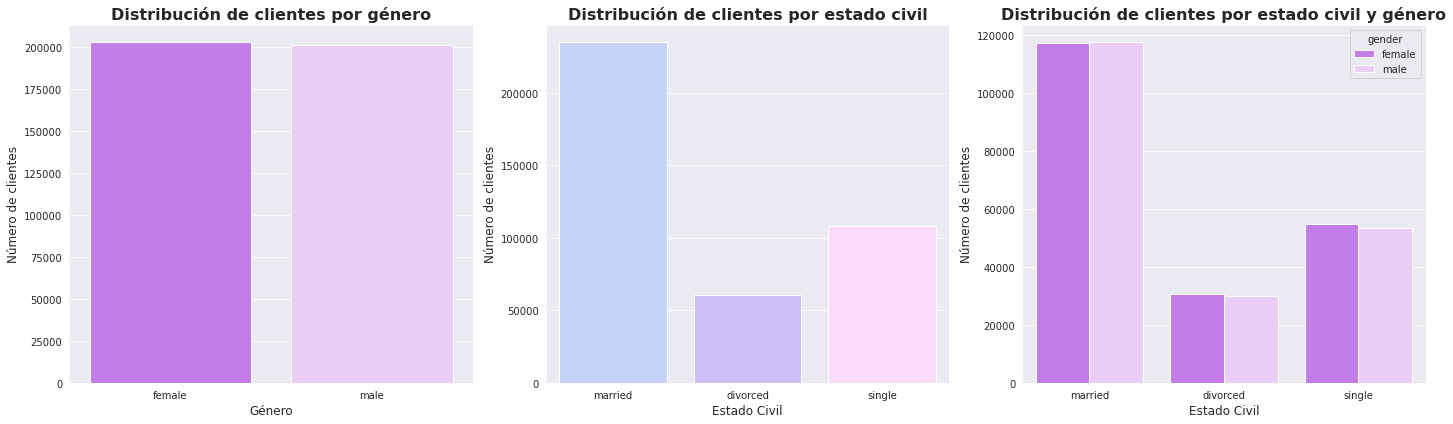

In [65]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

#Distribución de clientes por género
sns.countplot(x="gender", 
            data=df, 
            palette=["#c86bfa", "#eec7fc"], 
            ax=axs[0])

axs[0].set_title('Distribución de clientes por género', fontsize=16, fontweight='bold')
axs[0].set_xlabel('Género', fontsize=12)
axs[0].set_ylabel('Número de clientes', fontsize=12)

#Distribución de clientes por estado civil
sns.countplot(x="marital_status", 
            data=df, 
            palette=["#bbd0ff", "#c8b6ff", "#ffd6ff"], 
            ax=axs[1])

axs[1].set_title('Distribución de clientes por estado civil', fontsize=16, fontweight='bold')
axs[1].set_xlabel('Estado Civil', fontsize=12)
axs[1].set_ylabel('Número de clientes', fontsize=12)

#Distribución de clientes por estado civil y género
sns.countplot(x="marital_status", 
            hue="gender", 
            data=df, 
            palette=["#c86bfa", "#eec7fc"], 
            ax=axs[2])

axs[2].set_title('Distribución de clientes por estado civil y género', fontsize=16, fontweight='bold')
axs[2].set_xlabel('Estado Civil', fontsize=12)
axs[2].set_ylabel('Número de clientes', fontsize=12)

# Ajustar el diseño de los subplots
plt.tight_layout()

*Observando la gráfica podemos observar que sí hay una gran diferencia entre el estado civil de los clientes. Parece que la gran mayoría de los clientes están casados, mientras que la mínoría son los divorciados. En cuanto al género, no parece que haya diferencia.*

----

# Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:   

1. Preparación de Datos:   
    - Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'    
2. Análisis Descriptivo:   
    - Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del
número de vuelos reservados para cada grupo.   
3. Prueba Estadística:   
    - Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes
niveles educativos.

In [66]:
#Abrimos el CSV:

df = sp.leer_csv("files", "customer")
df.head(2)

,loyalty_number,country,province,city,postal_code,gender,education,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,flight_year,flight_month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,salary
0,480934,canada,ontario,toronto,m2z 4k1,female,bachelor,married,star,3839.14,standard,2016,february,0,unknown,2017,january,0,0,0,0,0,0,0,83236.0
1,480934,canada,ontario,toronto,m2z 4k1,female,bachelor,married,star,3839.14,standard,2016,february,0,unknown,2017,february,3,0,3,2823,282,0,0,83236.0


In [67]:
#Filtramos para sólo incluir las columnas relevantes:

df_filtro = df[["flights_booked", "education"]]
display(df_filtro.sample(3))
print("----")

#Veamos los valores únicos de cada una de las dos columnas:
sp.valores_unicos(df_filtro, ["flights_booked", "education"])

,flights_booked,education
271312,0,college
5750,11,bachelor
203823,0,college


----
La columna FLIGHTS_BOOKED tiene los siguientes valores únicos:


,flights_booked
0,196128
3,18228
11,15705
5,15084
7,14561


----
La columna EDUCATION tiene los siguientes valores únicos:


,education
bachelor,252567
college,102260
high school or below,18915
doctor,17731
master,12287


----


In [68]:
#Agrupamos los datos por nivel educativo:

educacion = df_filtro.groupby("education")

#Calculamos las estadísticas para los vuelos reservados por cliente:
educacion['flights_booked'].describe().T

#A primera vista no vemos demasiada diferencia entre el nivel educativo y el número de vuelos reservados.

education,bachelor,college,doctor,high school or below,master
count,252567.000000,102260.000000,17731.000000,18915.000000,12287.000000
mean,4.110288,4.169744,4.175512,4.176209,4.200700
std,5.221671,5.246040,5.256971,5.239267,5.213956
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000
max,21.000000,21.000000,21.000000,21.000000,21.000000


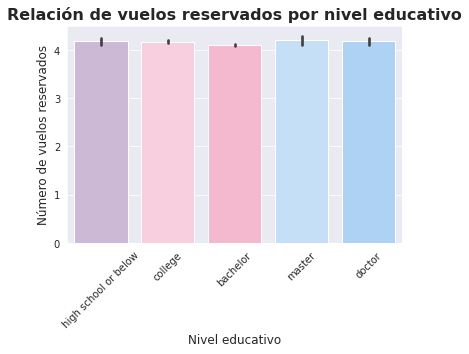

In [69]:
#Usemos una tabla para poder visualizarlo bien:

orden_educacion = ['high school or below', 'college', 'bachelor', 'master', 'doctor']

sns.barplot(x="education", 
            y="flights_booked", 
            data=df_filtro,  
            palette = ["#cdb4db", "#ffc8dd", "#ffafcc", "#bde0fe", "#a2d2ff"],
            order=orden_educacion)

plt.xticks(rotation=45)

plt.title("Relación de vuelos reservados por nivel educativo", fontsize=16, fontweight='bold')
plt.xlabel("Nivel educativo", fontsize=12)
plt.ylabel("Número de vuelos reservados", fontsize=12);

In [70]:
#Seguimos sin ver una clara diferencia entre los niveles educativos.

#Vamos a realizar la prueba de A/B testing para comprobar si existe una diferencia o no. Primero vamos a definir nuestras hipótesis:
#H0: No hay una diferencia significativa entre el nivel de educación y los vuelos reservados
#H1: Sí existe una diferencia significativa entre el nivel de educación y los vuelos reservados.
#Vamos a crear dos categorías para educación: educación básica y educación superior:

ed_basica = df_filtro[df_filtro["education"].isin(["high school or below"])]
ed_superior = df_filtro[df_filtro["education"].isin(["bachelor", "college", "master", "doctor"])]

display(ed_basica.sample(3))
print("----")
display(ed_superior.sample(3))

#Filtramos por vuelos reservados:
basica_vuelo = ed_basica["flights_booked"]
superior_vuelo = ed_superior["flights_booked"]


,flights_booked,education
124931,13,high school or below
211387,5,high school or below
138054,0,high school or below


----


,flights_booked,education
20120,8,bachelor
205447,0,bachelor
200941,2,bachelor


In [71]:
#Primero realizaremos el test de Shapiro-Wilk para comprobar la normalidad de los datos:
#Llamamos a una de las funciones del soporte:

#Hacemos la primera comprobación sobre el nivel educativo básico:
print("NIVEL EDUCATIVO BÁSICO: \n")
sp.test_shapiro(basica_vuelo)
print("----")

#La segunda comprobación sobre el nivel educativo superior:
print("NIVEL EDUCATIVO SUPERIOR: \n")
sp.test_shapiro(superior_vuelo)

NIVEL EDUCATIVO BÁSICO: 

Estadístico de prueba: 0.7922018766403198
Valor p: 0.0
Se rechaza la hipótesis nula: los datos no parecen provenir de una distribución normal.
----
NIVEL EDUCATIVO SUPERIOR: 

Estadístico de prueba: 0.7885639071464539
Valor p: 0.0
Se rechaza la hipótesis nula: los datos no parecen provenir de una distribución normal.


In [72]:
#Al no seguir una distribución normal debemos realizar el test de Mann-Whitney
#Utilizamos una función: 

sp.mann_whitney(basica_vuelo, superior_vuelo)

Estadístico de prueba: 3662315600.0
Valor p: 0.12400336700423258
No se rechaza la hipótesis nula: no hay diferencia significativa entre las muestras.


*Tras realizar las comprobaciones podemos confirmar que no existe una diferencia entre los vuelos reservados por clientes según su nivel de estudios.*  
*Para un futuro análisis tal vez sí sería interesante basarse en otras variables. En las gráficas hemos visto una diferencia entre las diferentes provincias, tal vez sería interesante estudiar esa relación. O ver si los clientes con mayor distancia registrada han reservado más vuelos o si la reserva de vuelos puede ir conectada a los puntos acumulados. Otra variable a estudiar en relación con la reserva de vuelos puede ser el salario o, incluso, los meses y cómo afectan las diferentes épocas del año (ya hemos visto en una de las visualizaciones que hay diferencia en el número de vuelos dependiendo del mes)*